## Importing the libraries

In [2]:
pip install --user imbalanced-learn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#checking the shpae of the dataset
df.shape

(614, 13)

In [6]:
#checking the columns of the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#checking the null values in the dataset
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.drop('Loan_ID',axis=1,inplace=True)

we are removing Loan_ID column as it is not giving any helpful information in predicting accuracy of the model

In [10]:
#checking he unique elements in the every columns
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
#Statistical information of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
#getting the categorical column from the dataset
df.dtypes[df.dtypes=='object']

Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [13]:
# Indentifying the continuous from the dataset
df.dtypes[df.dtypes!='object']

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

### finding unique values of categorical columns

In [14]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [19]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### Applying Simple Imputer and KNN imputer to fill missing values

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
s=SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)

In [23]:
miss_val=['Gender','Married','Dependents','Self_Employed','Credit_History']

In [24]:
df[miss_val]=s.fit_transform(df[miss_val])

In [25]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
from sklearn.impute import KNNImputer

In [27]:
k=KNNImputer(n_neighbors=2)

In [28]:
miss_val=['Loan_Amount_Term','LoanAmount']

In [29]:
df[miss_val]=k.fit_transform(df[miss_val])

In [30]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

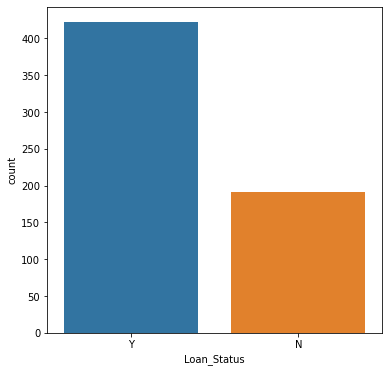

In [31]:
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(6,6))
sns.countplot(x='Loan_Status', data=df)

from above plot we see data is imbalance, we have tto work on this before building model

Yes    401
No     213
Name: Married, dtype: int64


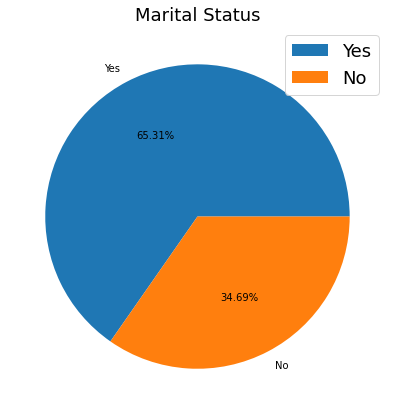

In [32]:
print(df['Married'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, autopct='%1.2f%%')
plt.title('Marital Status',fontsize=18)
plt.legend(prop={'size':18})
plt.show()

this plot shows that married people have high values with Loan status

Male      502
Female    112
Name: Gender, dtype: int64


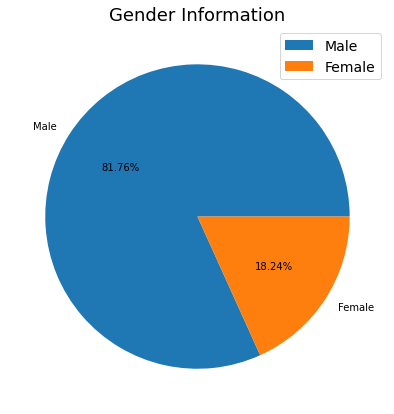

In [33]:
print(df['Gender'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Gender Information',fontsize=18)
plt.legend(prop={'size':14})
plt.show()

From above plot we see that male percentage is more as per femal

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


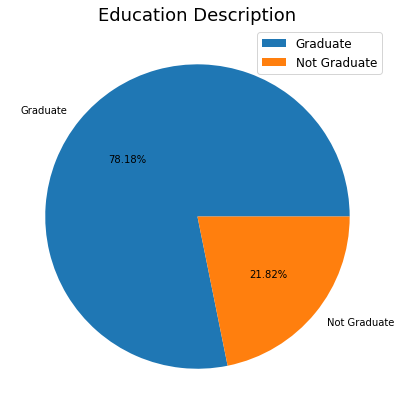

In [34]:
print(df['Education'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(df['Education'].value_counts(),labels=df['Education'].value_counts().index, autopct='%1.2f%%')
plt.title('Education Description', fontsize=18)
plt.legend(prop={'size':12})
plt.show()

Here Graduate people are high compared to Non Graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64


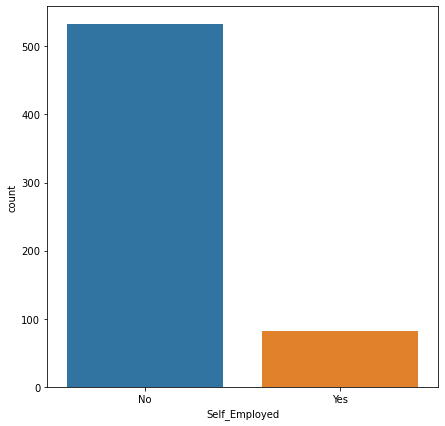

In [35]:
print(df['Self_Employed'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(x='Self_Employed',data=df)
plt.show()

This show self employed are less is numbers

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


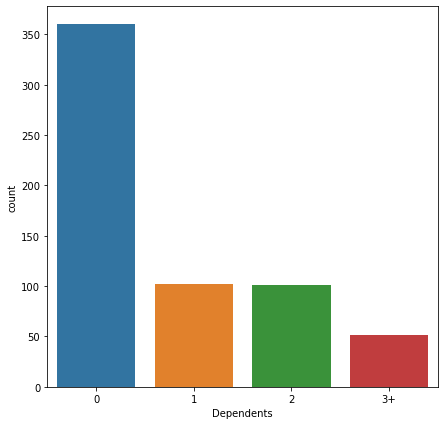

In [36]:
print(df['Dependents'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(x='Dependents',data=df)
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


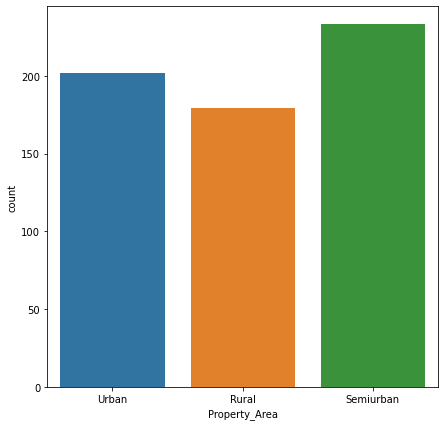

In [37]:
print(df['Property_Area'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(x='Property_Area',data=df)
plt.show()

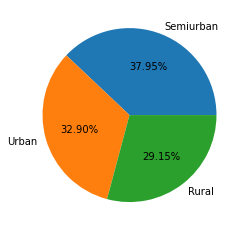

In [38]:
labels='Semiurban','Urban','Rural'
fig,ax=plt.subplots()
ax.pie(df['Property_Area'].value_counts(),labels=labels,radius =1,autopct ='%1.2f%%')
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


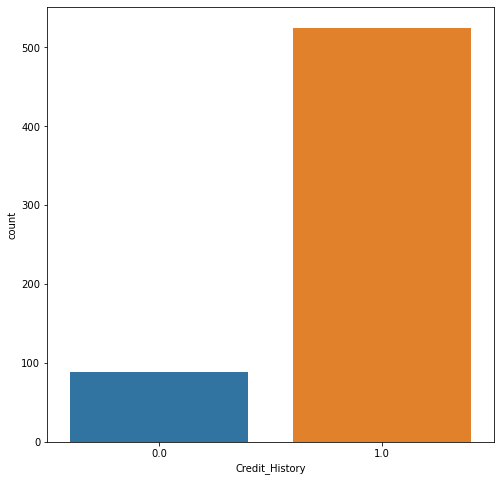

In [39]:
print(df['Credit_History'].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x='Credit_History',data=df)
plt.show()

## Analysis of continuous data column

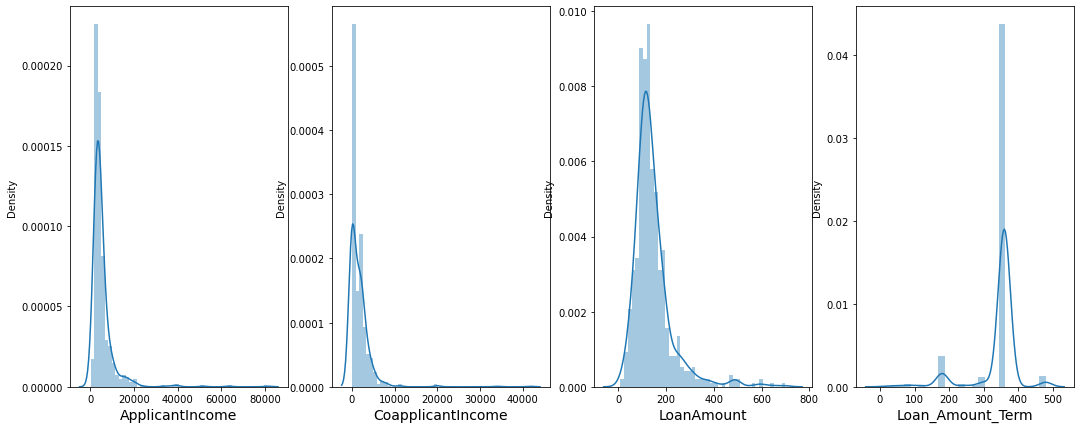

In [40]:
plt.figure(figsize=(18,7))
plot_num=1
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plot_num<=5:
        plt.subplot(1,4,plot_num)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=14)
    plot_num+=1
plt.show()

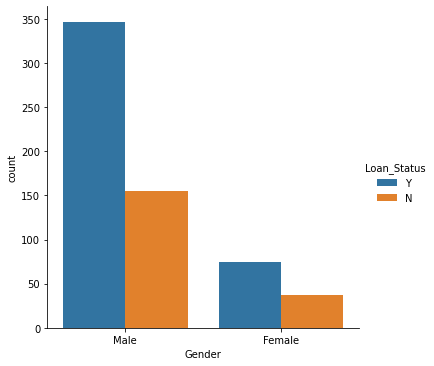

In [41]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status')
plt.xticks(rotation=0);

More number of male applicants get loan approval than Female applicants. This may also due to the fact that there are more male applicants than female applicants.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

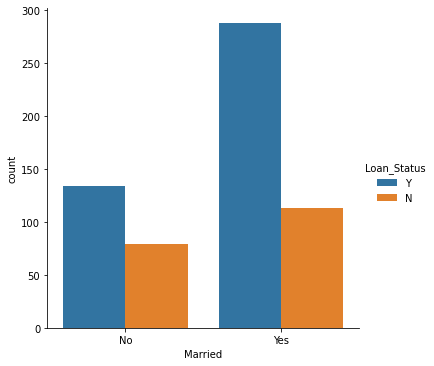

In [42]:
sns.factorplot('Married',kind='count',data=df, hue='Loan_Status')
plt.xticks(rotation=0)

Married people get more number of loan approval

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')])

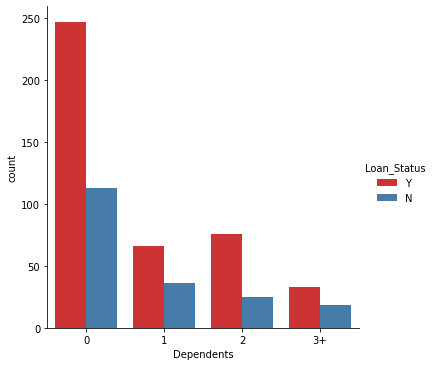

In [43]:
sns.factorplot('Dependents',kind='count',data=df, hue='Loan_Status',palette='Set1')
plt.xticks(rotation=0)

dependent with 0 have higher loan approvals

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

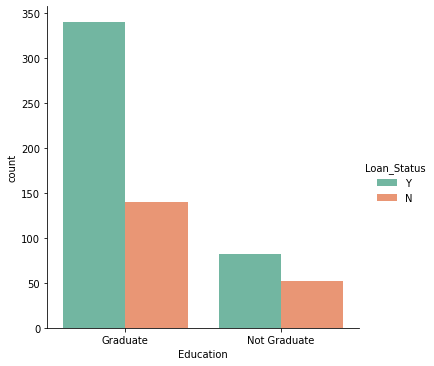

In [44]:
sns.factorplot('Education',kind='count',data=df, hue='Loan_Status',palette='Set2')
plt.xticks(rotation=0)

Graduate get high number of loan approval 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

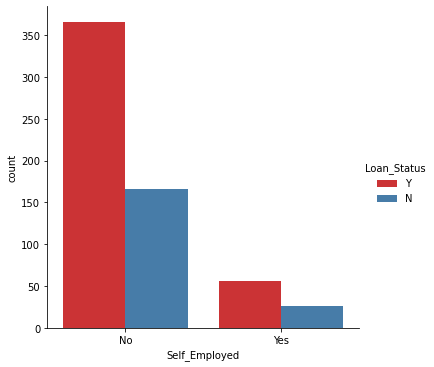

In [45]:
sns.factorplot('Self_Employed',kind='count',data=df, hue='Loan_Status',palette='Set1')
plt.xticks(rotation=0)

## Bivarant Analysis

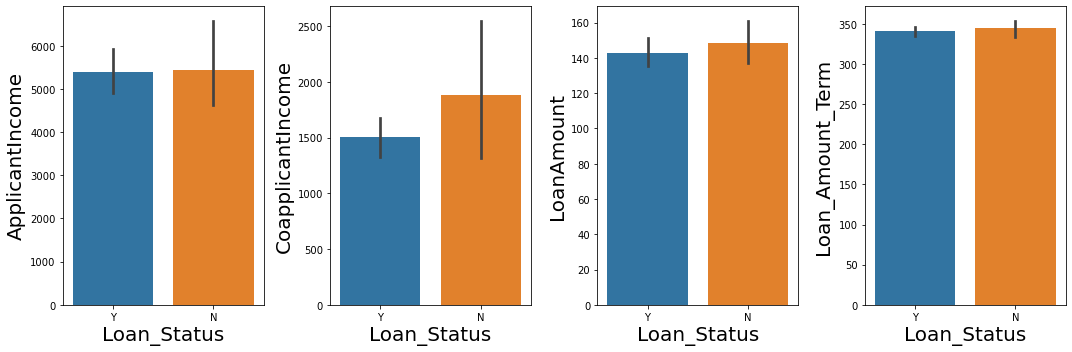

In [46]:
plt.figure(figsize=(15,5),facecolor='white')
plotnum=1
y=df['Loan_Status']
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.barplot(y,df[i])
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plotnum+=1
plt.tight_layout()

from above graph we observe as follows:

Applicant income not seem to contribute much to loan approval.

Loan rejection high for higher Coapplicant Income.

LoanAmount does not seem to have a strong correlation with Loan Status.

## Multivarant Analysis

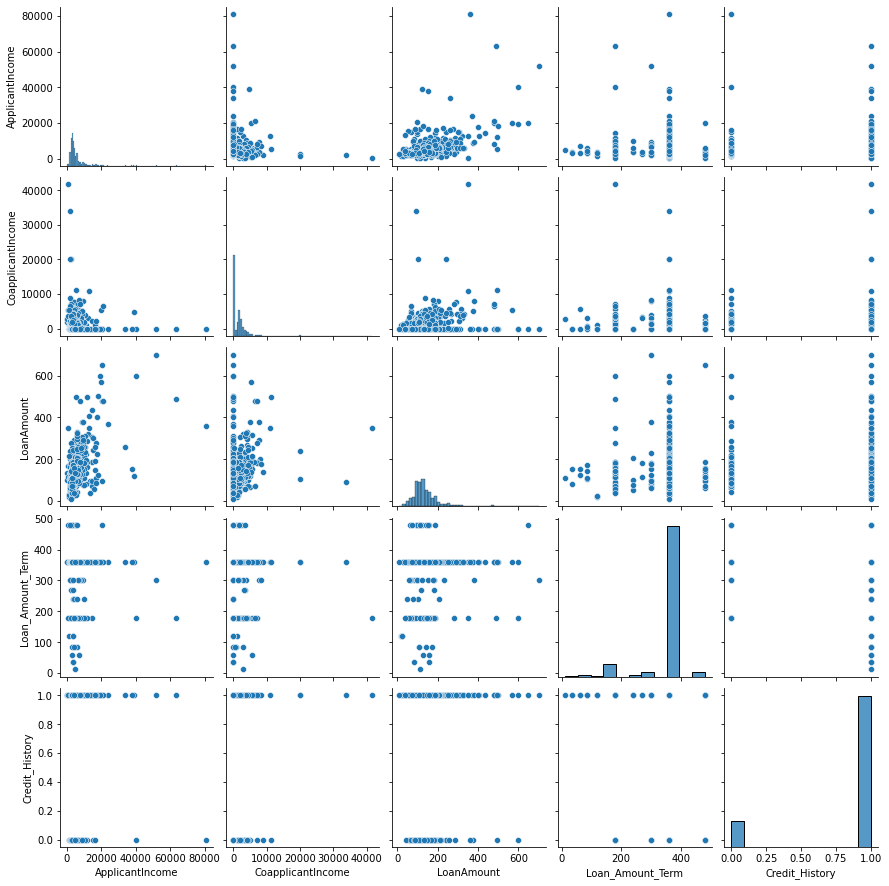

In [47]:
sns.pairplot(df)

here Pairplot show how data is distributed for each numeric column

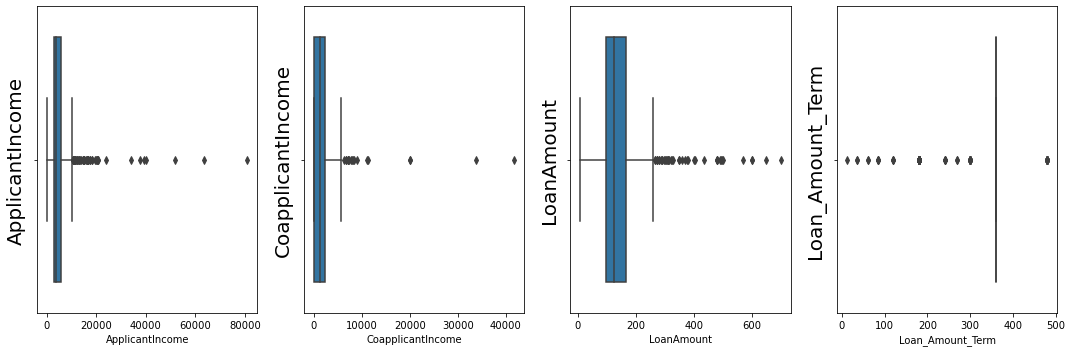

In [48]:
# BOX PLot
plt.figure(figsize=(15,5),facecolor='white')
plotnum=1
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.boxplot(df[i])
        plt.ylabel(i,fontsize=20)
    plotnum+=1
plt.tight_layout()

### Zscore for removing outliers

In [49]:
feature=df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

In [50]:
z=np.abs(zscore(feature))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,97.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
df=df_new.copy()

In [52]:
df.shape

(577, 12)

In [53]:
loss=(612-577)/612*100
loss

5.718954248366013

data loss is 5.71% which is less than 10 and can be affordable so we go ahead to build a model

## Label Encoding

In [54]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,97.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Ordinal Encoder

In [55]:
oe=OrdinalEncoder()
df['Gender']=oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed']=oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area']=oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))

In [56]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,97.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1


In [57]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.167275
Loan_Amount_Term    -2.059849
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## splitting the tartget and independent varibales in x and y 

In [58]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [59]:
from sklearn.preprocessing import PowerTransformer

In [60]:
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])


In [61]:
df.skew()


Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.597820
Loan_Amount_Term    -2.059849
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [62]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188828,0.045696,-0.006207,0.060302,0.235133,0.176124,-0.108327,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.345029,0.024817,-0.015779,-0.026283,0.339399,0.184809,-0.132644,0.019308,0.010595,0.089026
Dependents,0.188828,0.345029,1.000000,0.065629,0.056754,0.108236,0.018101,0.132190,-0.088233,-0.018182,0.021226,0.019319
Education,0.045696,0.024817,0.065629,1.000000,-0.007139,-0.174609,0.054682,-0.111115,-0.085786,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.056754,-0.007139,1.000000,0.207418,-0.089466,0.110901,-0.029724,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060302,-0.026283,0.108236,-0.174609,0.207418,1.000000,-0.362495,0.395979,-0.064349,0.027449,-0.010603,-0.001761
CoapplicantIncome,0.235133,0.339399,0.018101,0.054682,-0.089466,-0.362495,1.000000,0.204822,-0.002969,0.008071,-0.072402,0.081455
LoanAmount,0.176124,0.184809,0.132190,-0.111115,0.110901,0.395979,0.204822,1.000000,0.047013,-0.008491,-0.107829,-0.014043
Loan_Amount_Term,-0.108327,-0.132644,-0.088233,-0.085786,-0.029724,-0.064349,-0.002969,0.047013,1.000000,0.029535,-0.058964,-0.021241
Credit_History,0.013172,0.019308,-0.018182,-0.075217,-0.016390,0.027449,0.008071,-0.008491,0.029535,1.000000,-0.008121,0.560936


## Heatmap

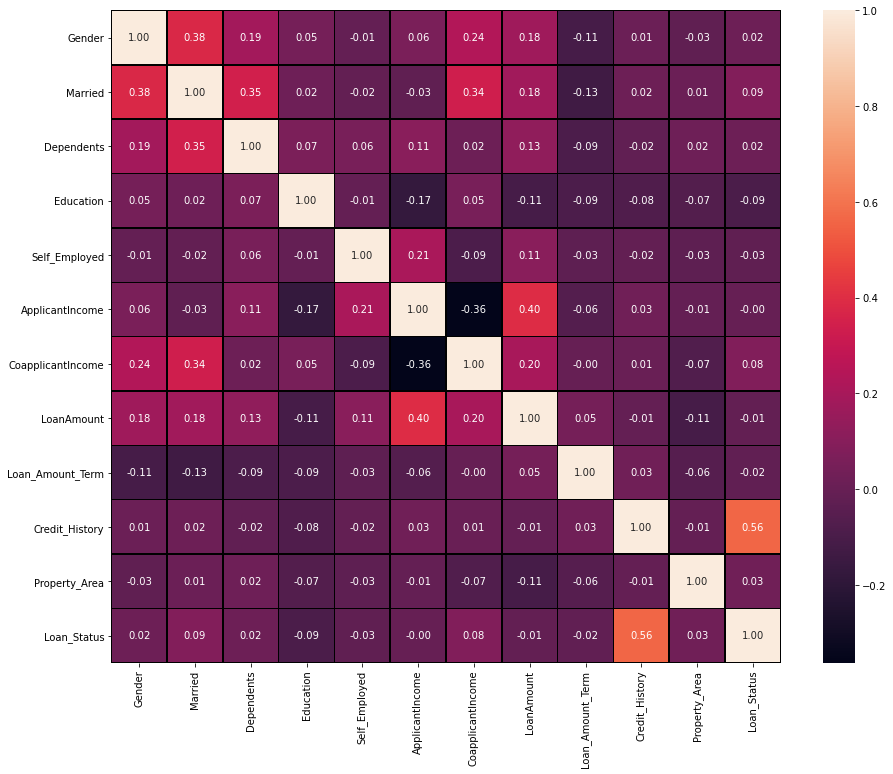

In [63]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True, linecolor='black',linewidth='0.5', fmt='.2f')
plt.show()

## Feature Scaling

In [64]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [65]:
x.shape

(577, 11)

In [66]:
y.shape

(577,)

In [68]:
sc= StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.77514304, ...,  0.23781291,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.23781291,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.77514304, ...,  0.23781291,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.23781291,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.36281681, ...,  0.23781291,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.77514304, ...,  0.23781291,
        -2.38941464, -0.03952504]])

In [69]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [78]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

## Model Building

In [86]:
max_acc=0
max_RS=0

for i in range(1,500):
    x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_acc:
        max_acc=acc_score
        max_RS=i

print("Best accuracy score is", max_acc,"on Random State", max_RS) 

Best accuracy score is 77.88944723618091 on Random State 86


## Machine Learning Model for Classification with Evaluation Metrics

In [87]:
# Classification Model Function

def classify(model,x,y):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=86)
    
    # Training the model
    model.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [88]:
# Logistic Regression

model=LogisticRegression()
classify(model,x,y)

Accuracy Score: 77.88944723618091

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.68        84
           1       0.74      0.95      0.83       115

    accuracy                           0.78       199
   macro avg       0.81      0.75      0.75       199
weighted avg       0.80      0.78      0.77       199

Cross Validation Score: 72.23899371069182

Accuracy Score - Cross Validation Score is 5.650453525489098


In [89]:
model=SVC()
classify(model,x,y)

Accuracy Score: 79.89949748743719

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72        84
           1       0.77      0.93      0.84       115

    accuracy                           0.80       199
   macro avg       0.82      0.77      0.78       199
weighted avg       0.81      0.80      0.79       199

Cross Validation Score: 74.75157232704402

Accuracy Score - Cross Validation Score is 5.1479251603931715


In [109]:
# Random Forest Classifier

model=RandomForestClassifier()
classify(model,x,y)

Accuracy Score: 87.43718592964824

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85        84
           1       0.89      0.90      0.89       115

    accuracy                           0.87       199
   macro avg       0.87      0.87      0.87       199
weighted avg       0.87      0.87      0.87       199

Cross Validation Score: 82.42374213836477

Accuracy Score - Cross Validation Score is 5.013443791283464


In [91]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,x,y)

Accuracy Score: 77.88944723618091

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        84
           1       0.78      0.85      0.82       115

    accuracy                           0.78       199
   macro avg       0.78      0.77      0.77       199
weighted avg       0.78      0.78      0.78       199

Cross Validation Score: 72.86713836477986

Accuracy Score - Cross Validation Score is 5.0223088714010515


In [92]:
#Decision Tree Classifier

model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy Score: 77.38693467336684

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.76        84
           1       0.86      0.73      0.79       115

    accuracy                           0.77       199
   macro avg       0.78      0.78      0.77       199
weighted avg       0.79      0.77      0.78       199

Cross Validation Score: 77.6493710691824

Accuracy Score - Cross Validation Score is -0.26243639581555556


In [93]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,x,y)

Accuracy Score: 85.42713567839196

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83        84
           1       0.87      0.88      0.87       115

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.85      0.85      0.85       199

Cross Validation Score: 80.03852201257861

Accuracy Score - Cross Validation Score is 5.388613665813352


## Hyper Parameter tuning with selected model

In [112]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [5,10,15,20,25],
             'n_estimators':[20,40,60,80,100],
             'max_features': ["auto","sqrt","log2"]}

In [113]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [115]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 60}

In [120]:
final_model=RandomForestClassifier(criterion="entropy", max_depth=20 , max_features="log2" ,n_estimators=60)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

79.89949748743719


We have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score 79.89%

In [121]:
# Saving the model using .pkl
import joblib
joblib.dump(acc,"Loan_Prediction_Project.pkl")

['Loan_Prediction_Project.pkl']